# 6.3 Supervised Machine Learning: Regression

## Table of contents
1. [Importing Libraries & Data](#imports)
2. [Data Cleaning](#paragraph1)
3. [Data prep for regression analysis](#paragraph2)
4. [Regression analysis](#paragraph3)
5. [Summary](#paragraph4)

### 1. Importing Libraries & Data <a name="imports"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path = r'C:\Users\deuts\Desktop\Airbnb'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_df.pkl'))

### 2. Data Cleaning <a name="paragraph1"></a>

In [5]:
# Checking column names
df.columns

Index(['id', 'name', 'host_id', 'host_since', 'street', 'neighbourhood',
       'city', 'state', 'zipcode', 'country', 'latitude', 'longitude',
       'property_type', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'host_listings', 'reviews_per_month', 'price_group'],
      dtype='object')

In [6]:
# Checking shape
df.shape

(5213, 22)

In [7]:
# Checking for missing values
df.isnull().sum()

# No missing values

id                      0
name                    0
host_id                 0
host_since              0
street                  0
neighbourhood           0
city                    0
state                   0
zipcode                 0
country                 0
latitude                0
longitude               0
property_type           0
bedrooms                0
price                   0
minimum_nights          0
availability_365        0
number_of_reviews       0
review_scores_rating    0
host_listings           0
reviews_per_month       0
price_group             0
dtype: int64

In [8]:
# Checking for duplicates
dups = df.duplicated()

In [9]:
dups.shape # No dups

(5213,)

C:\Users\deuts\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

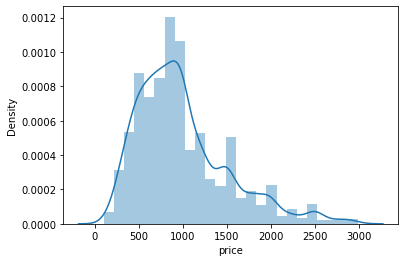

In [10]:
sns.distplot(df['price'], bins=25) # Checking for extreme values

# Some of the outliers in the high values  may need to be removed, but let's try without doing so first as these high
# can easily be real values.

In [11]:
# Checking descriptive statistics for the 'price' variable
df['price'].describe()

count    5213.000000
mean      990.957990
std       525.615798
min        98.000000
25%       598.000000
50%       902.000000
75%      1197.000000
max      2992.000000
Name: price, dtype: float64

In [12]:
# Checking descriptive statistics for the 'bedrooms' variable
df['bedrooms'].describe()

count    5213.000000
mean        1.400537
std         1.009707
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: bedrooms, dtype: float64

In [13]:
df['bedrooms'].value_counts()

1.0     3072
2.0      881
0.0      548
3.0      452
4.0      207
5.0       43
6.0        8
10.0       2
Name: bedrooms, dtype: int64

### 3. Data prep for regression analysis  <a name="paragraph2"></a>

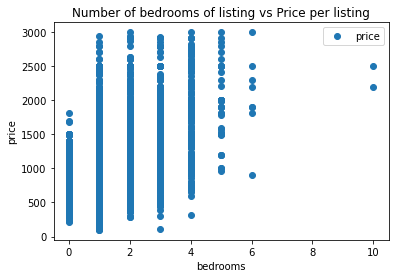

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'bedrooms', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of bedrooms of listing vs Price per listing')  
plt.xlabel('bedrooms')  
plt.ylabel('price')  
plt.show()

In [15]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X = df['bedrooms'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [16]:
X

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

In [17]:
y

array([[1285.],
       [ 745.],
       [ 667.],
       ...,
       [ 245.],
       [ 461.],
       [2491.]])

In [18]:
# Spliting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4.  Regression analysis <a name="paragraph3"></a>

In [19]:
# Creating a regression object
regression = LinearRegression()

In [20]:
# Fiting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

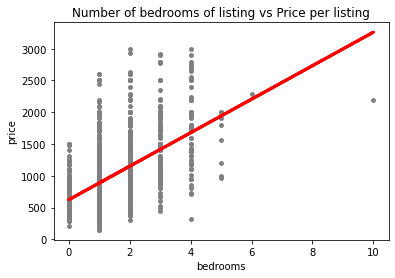

In [22]:
# Creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of bedrooms of listing vs Price per listing')
plot_test.xlabel('bedrooms')
plot_test.ylabel('price')
plot_test.show()

In [23]:
# Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [24]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[263.6442192]]
Mean squared error:  199878.2717357255
R2 score:  0.2652683387819744


#### Slope: There is a positive relationship, so the coefficient is positve, too
#### MSE: It's quite large, a regression may not be the best model to represent this data and can’t accurately predict the influence of the number of bedrooms of a Airbnbn listing on it's price per listing.
#### R2:  0.27 is close to 0, which indicates a poor fit of the model.

In [25]:
y_predicted

array([[ 887.0896868 ],
       [ 887.0896868 ],
       [ 887.0896868 ],
       ...,
       [1414.37812521],
       [ 623.4454676 ],
       [1150.733906  ]])

In [26]:
# Creating a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,745.0,887.089687
1,245.0,887.089687
2,893.0,887.089687
3,383.0,887.089687
4,1373.0,887.089687
5,598.0,1414.378125
6,902.0,887.089687
7,1599.0,1150.733906
8,598.0,887.089687
9,1285.0,1150.733906


#### Here it gets even clearer, the predicted values do not match the actual ones at all, so the modell is not a good fit.

In [27]:
# Predicting
y_predicted_train = regression.predict(X_train)

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[263.6442192]]
Mean squared error:  206350.11265673008
R2 score:  0.25766593514232305


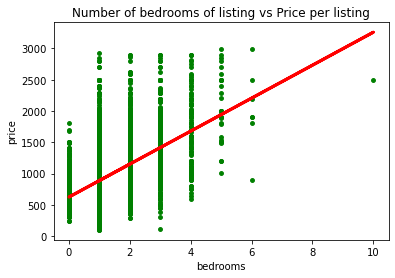

In [30]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of bedrooms of listing vs Price per listing')
plot_test.xlabel('bedrooms')
plot_test.ylabel('price')
plot_test.show()

#### There is a wide dispersion of points, as this is also where the highest density of points within your data is, this just further confirms a single regression line not being the most accurate prediction model. There is need of a model with more dimensionality to accurately predict listing prices.

In [31]:
# Get quantile for columns with outliers from original data frame
q1 = df['price'].quantile(0.99)
q2 = df['bedrooms'].quantile(0.99)

In [32]:
# Creating clean original data frame without outliers
df_clean = df[df['price'] < q1]
df_clean = df_clean[df_clean['bedrooms'] < q2]

In [33]:
df_clean.describe()

,id,host_id,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,host_listings,reviews_per_month
count,5.108000e+03,5.108000e+03,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000,5108.000000
mean,1.878889e+07,6.845554e+07,1.345928,962.390368,3.083790,57.629209,15.690486,95.647024,1.271926,0.626860
std,1.062114e+07,7.249444e+07,0.914576,484.937639,2.539453,102.548310,21.699091,6.560030,1.014222,1.252747
min,1.453200e+05,9.842000e+03,0.000000,98.000000,1.000000,0.000000,1.000000,20.000000,1.000000,0.000000
25%,9.520856e+06,1.475342e+07,1.000000,598.000000,2.000000,0.000000,3.000000,94.000000,1.000000,0.000000
50%,1.893926e+07,3.731034e+07,1.000000,893.000000,2.000000,0.000000,7.000000,98.000000,1.000000,0.000000
75%,2.671598e+07,9.841109e+07,2.000000,1197.000000,4.000000,67.000000,18.000000,100.000000,1.000000,1.000000
max,3.796416e+07,2.871015e+08,4.000000,2570.000000,21.000000,365.000000,135.000000,100.000000,10.000000,9.000000


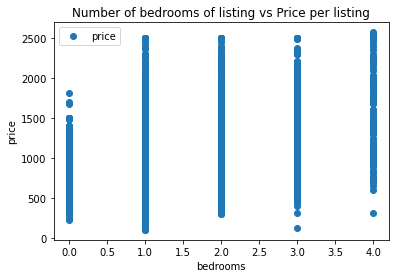

In [34]:
# See how the scatterplot looks without outliers.

df_clean.plot(x = 'bedrooms', y='price', style='o')  
plt.title('Number of bedrooms of listing vs Price per listing')  
plt.xlabel('bedrooms')  
plt.ylabel('price')  
plt.show()

In [35]:
# Reshape again.
X_2 = df_clean['bedrooms'].values.reshape(-1,1)
y_2 = df_clean['price'].values.reshape(-1,1)

In [36]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [37]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [38]:
# Predicting
y_predicted_2 = regression.predict(X_test_2)

In [39]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[256.93180284]]
Mean squared error:  177792.21431681668
R2 score:  0.18537740829615434


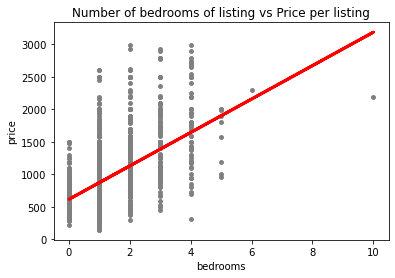

In [41]:
# Visualizing the test set results
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_train, regression.predict(X_train), color='red', linewidth =3)
plot_test.title('Number of bedrooms of listing vs Price per listing')
plot_test.xlabel('bedrooms')
plot_test.ylabel('price')
plot_test.show()

In [42]:
# There is not a big differnce, when removing some of the extreme values, and these also shouldn't be removed as these are 
# real prices.

### 5.  Summary <a name="paragraph4"></a>

#### It is pretty clear, that the used model is not sufficiant and a good fit to modell the price per listing. There is need of a model with more dimensionality to accurately predict listing prices.
#### Which makes sense as number of bedrooms is only one dimension, that affects the price, there much more, such as distance to public transportation or central spots in the city or the the furnishings as well as the size of the listing and probably some more.
#### So to further investigate what affects the price of the listings, such factors should be taken into considoration by creating a model with more dimensionality.
#### Also there is a problem with the number of bedrooms, since there is probably a turning point, in which there no demand for more beds/bedrooms, that needs to be considered. Furthermore there could be a collection bias when counting the number of bedrooms, since there is no documentation what defines a bedroom, for example, is a living room with a bed/sleeping couch also a bedroom and so on.